In [18]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
train = pd.read_csv("/Users/ttonny0326/GitHub_Project/LSTM_wikipedia/train.csv", encoding='ISO-8859-1', low_memory=False)
test_labels = pd.read_csv("/Users/ttonny0326/GitHub_Project/LSTM_wikipedia/test_labels.csv", encoding='ISO-8859-1', low_memory=False)
test = pd.read_csv("/Users/ttonny0326/GitHub_Project/LSTM_wikipedia/train.csv", encoding='ISO-8859-1', low_memory=False)

stopwords = set(stopwords.words('english'))
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ttonny0326/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
test_labels.head(15)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    #re.sub()依據pattern及repl對string進行處理，結果回傳處理過的新字串，將前面 "" 中的文字轉換成後面 "" 中的文字 

    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text) 
    #移除非文字字元，並將其轉為空格 

    text = re.sub('[^A-Za-z\' ]+', '',text) 
    #除了單引號的非字母、數字字元，其餘皆刪除並且保留單引號，刪掉其他符號，例如@#$%^&*@&#^@&

    text = re.sub('\s+', ' ', text)
    #將任何非空白字元皆轉為空格，換行符號轉換為空格，例如\n 轉為空格

    text = text.strip(' ')
    #strip() 方法用於移除字串頭尾指定的字符（默認為空格或換行符）或字符序列，將首尾空格刪掉，例如123 abc改為123abc

    text = ' '.join([word for word in text.split() if word not in (stopwords)]) 
    #將評論中的定冠詞去除，例如the 刪掉

    return text
    #統整國外相關處理方式

In [7]:
train["comment_text"] = train["comment_text"].fillna('').apply(clean_text)
test["comment_text"] = test["comment_text"].fillna('').apply(clean_text)

#使用上方自訂函數導入評論進行處理
#使用fillna('')將缺失值替換成空格''

In [8]:
train 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


In [9]:
train_data = train["comment_text"]
test_data = test["comment_text"]
#將處理好的評論給定名稱

train_label=train[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
test_label=test_labels[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
#將六個labels裁好給定另一個名稱

In [10]:
train_data 

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [11]:
tokenizer = Tokenizer(num_words = 40000) #40000 words are used here
tokenizer.fit_on_texts(train_data)

#建立一個40000的token字典

train_final = tokenizer.texts_to_sequences(train_data) #train_final儲存每個評論的word轉為的數字list
test_final = tokenizer.texts_to_sequences(test_data)

<function matplotlib.pyplot.show(close=None, block=None)>

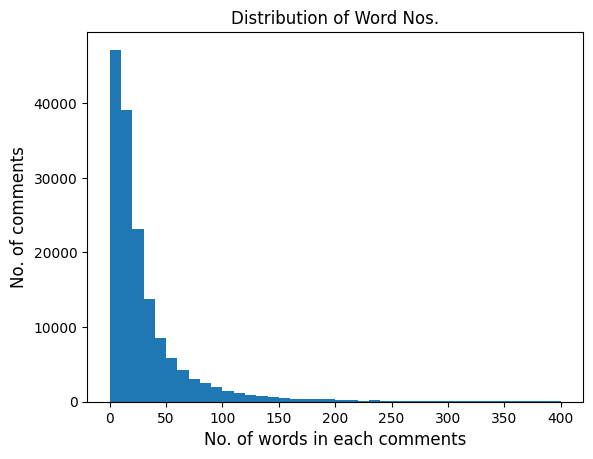

In [15]:
totalNumWords = [len(one_comment) for one_comment in train_final ] #totalNumWords儲存每個評論的字個數
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.title("Distribution of Word Nos.")
plt.ylabel('No. of comments', fontsize=12)
plt.xlabel('No. of words in each comments', fontsize=12)
plt.show

#橫軸為:每個評論的word數
#縱軸為:評論個數

In [19]:
train_padded =pad_sequences(train_final, maxlen=150)
test_padded =pad_sequences(test_final, maxlen=150)
print("Shape of training data",train_padded.shape)
print("Shape of testing data",test_padded.shape)
#進行截長補短，讓所有評論的數字 list 長度都改為150

Shape of training data (159571, 150)
Shape of testing data (159571, 150)


In [20]:
model = Sequential()
model.add(Embedding(input_dim=40000,output_dim=64, input_length=150))  
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary() #檢視模型摘要

#建立model

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-15 13:57:09.344308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-15 13:57:09.345233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           2560000   
                                                                 
 lstm (LSTM)                 (None, 150, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 2,626,438
Trainable params: 2,626,438
Non-trainable params: 0
_________________________________________________________________


In [21]:
from sklearn.model_selection import cross_val_score
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_val, y_train, y_val = train_test_split(train_padded, train_label, shuffle = True, random_state = 123)

In [22]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(119678, 150)
(39893, 150)
(119678, 6)
(39893, 6)


In [23]:
history1=model.fit(x_train, y_train, batch_size = 70, epochs = 3, validation_data = (x_val, y_val))

Epoch 1/3


2023-08-15 13:57:32.272917: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-15 13:57:33.276174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 13:57:34.217521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 13:57:35.559790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 13:57:37.125891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 13:57:38.428874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1710/1710 [==============================] - ETA: 0s - loss: 0.0865 - auc: 0.9367

2023-08-15 14:00:54.096729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 14:00:54.217454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 14:00:54.542100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1710/1710 [==============================] - 228s 130ms/step - loss: 0.0865 - auc: 0.9367 - val_loss: 0.0547 - val_auc: 0.9747
Epoch 2/3
1710/1710 [==============================] - 210s 123ms/step - loss: 0.0492 - auc: 0.9823 - val_loss: 0.0478 - val_auc: 0.9795
Epoch 3/3
1710/1710 [==============================] - 209s 122ms/step - loss: 0.0435 - auc: 0.9859 - val_loss: 0.0491 - val_auc: 0.9751


In [24]:
history1.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

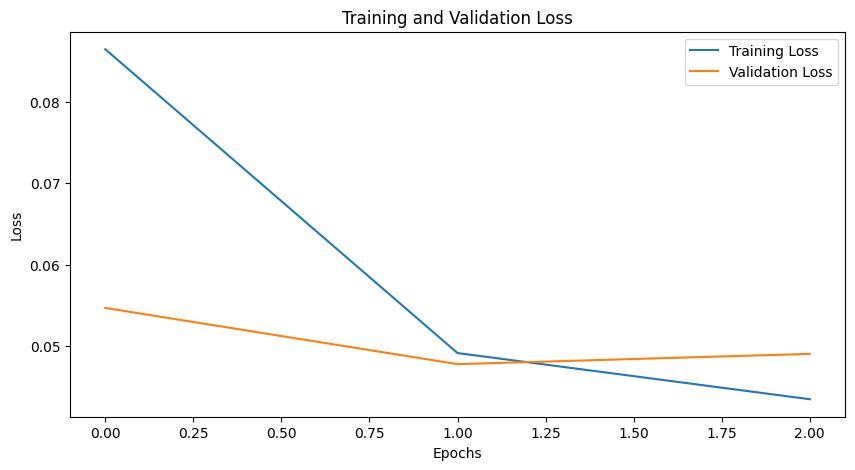

In [26]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

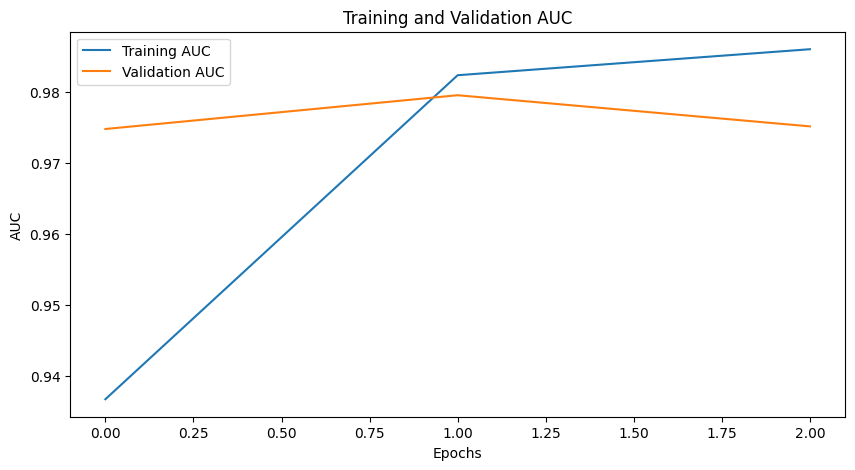

In [27]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['auc'], label='Training AUC')
plt.plot(history1.history['val_auc'], label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [28]:
history2=model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
935/935 [==============================] - 172s 182ms/step - loss: 0.0387 - auc: 0.9892 - val_loss: 0.0491 - val_auc: 0.9760
Epoch 2/10
935/935 [==============================] - 151s 162ms/step - loss: 0.0359 - auc: 0.9909 - val_loss: 0.0515 - val_auc: 0.9694
Epoch 3/10
935/935 [==============================] - 150s 160ms/step - loss: 0.0338 - auc: 0.9922 - val_loss: 0.0538 - val_auc: 0.9648
Epoch 4/10
935/935 [==============================] - 149s 159ms/step - loss: 0.0314 - auc: 0.9933 - val_loss: 0.0571 - val_auc: 0.9587
Epoch 5/10
935/935 [==============================] - 154s 165ms/step - loss: 0.0289 - auc: 0.9941 - val_loss: 0.0577 - val_auc: 0.9630
Epoch 6/10
935/935 [==============================] - 167s 179ms/step - loss: 0.0265 - auc: 0.9952 - val_loss: 0.0624 - val_auc: 0.9488
Epoch 7/10
935/935 [==============================] - 156s 166ms/step - loss: 0.0249 - auc: 0.9954 - val_loss: 0.0660 - val_auc: 0.9449
Epoch 8/10
935/935 [============================

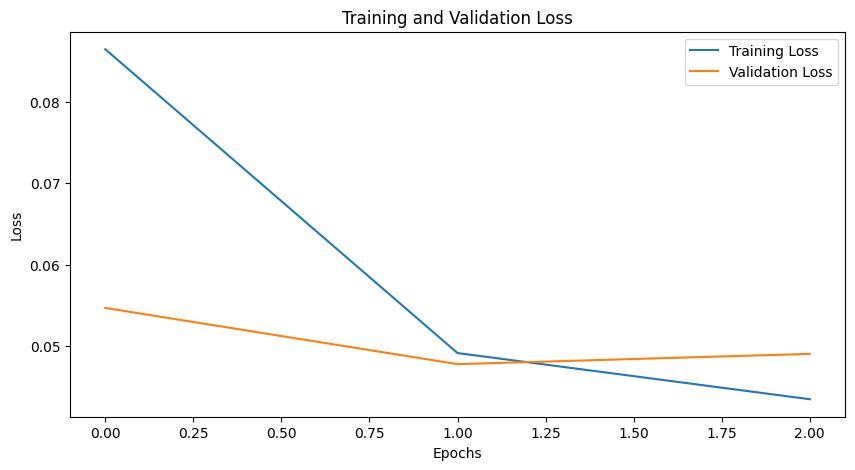

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

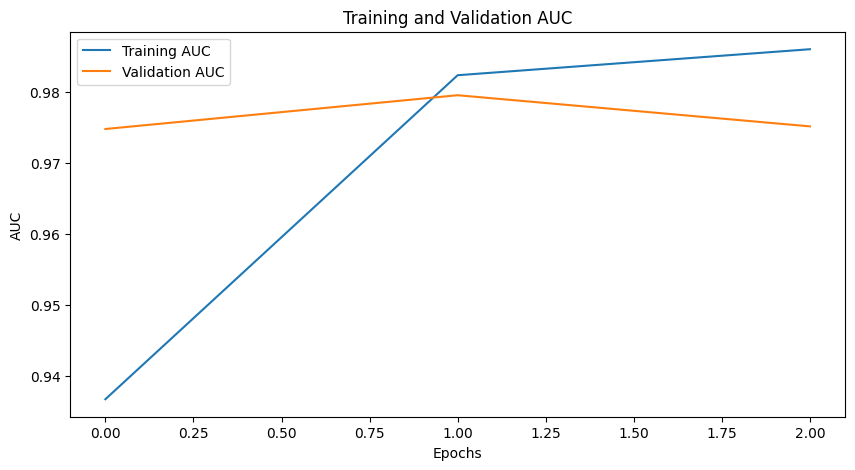

In [30]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['auc'], label='Training AUC')
plt.plot(history1.history['val_auc'], label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
for batch_size in [32,50,64,70,128]:
    for epochs in [1,2,3]:  
        model = Sequential()
        model.add(Embedding(input_dim=40000,output_dim=64, input_length=150))  
        model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
        model.add(LSTM(units = 64, dropout = 0.2))
        model.add(Dense(units = 6, activation = 'sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
        x_train, x_val, y_train, y_val = train_test_split(train_padded, train_label, shuffle = True, random_state = 123)
        #對參數每種組合，訓練一個SVC
        history=model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))
        #用驗證資料集(valid set)評估SVC



In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [32]:
model.save('lstm_model.h5')